<a href="https://colab.research.google.com/github/dharapatel2908/dice/blob/main/Titanic-dataset_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
train = files.upload()
test = files.upload()
survived = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


Saving gender_submission.csv to gender_submission.csv


Explore the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [ ]:
test =pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
survived = pd.read_csv("gender_submission.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)
print("Survived Shape : ",survived.shape)

Train Shape :  (891, 12)
Test Shape :  (418, 11)
Survived Shape :  (418, 2)


In [ ]:
mean = survived.mean()
print("Mean: \n",mean)
variance = survived.var()
print("Variance: \n",variance)
std_dev = survived.std()
print("Standard Deviation: \n",std_dev)
skewness = survived.skew()
print("Skewness: \n",skewness)
kurtosis = survived.kurt()
print("Kurtosis: \n",kurtosis)

Mean: 
 PassengerId    1100.500000
Survived          0.363636
dtype: float64
Variance: 
 PassengerId    14595.166667
Survived           0.231960
dtype: float64
Standard Deviation: 
 PassengerId    120.810458
Survived         0.481622
dtype: float64
Skewness: 
 PassengerId    0.000000
Survived       0.568991
dtype: float64
Kurtosis: 
 PassengerId   -1.200000
Survived      -1.684332
dtype: float64


In [ ]:
survive = train["Survived"]
survive.unique()

array([0, 1])

In [ ]:
print("Check whether there is any missing values in survived dataset :")
if survive.isnull().sum() ==0:
  print("no missing values")
else:
  print("missing values")

Check whether there is any missing values in survived dataset :
no missing values


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
print("Check Null values :")
print(train.isna().sum())
print(test.isna().sum())

Check Null values :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
fig = px.pie(survive.value_counts(), names=survive.map({1:'Survived (1)', 0:'Not survived (0)'}), 
    color_discrete_sequence=['yellow', 'green'], width=500, height=500)
fig.update_traces(textinfo='percent+value')
fig.show()

In [ ]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = (sum(women)*100)/len(women)

print("Percentage(%) of Women who survived :", rate_women)

Percentage(%) of Women who survived : 74.20382165605096


In [ ]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = (sum(men)*100)/len(men)

print("Percentage(%) of Men who survived :", rate_men)

Percentage(%) of Men who survived : 18.890814558058924


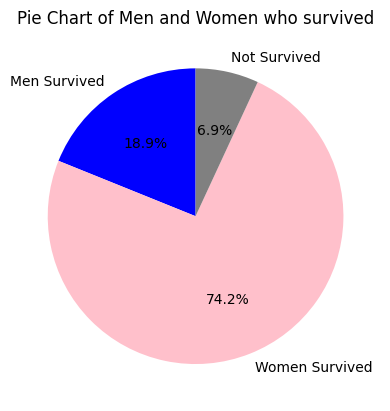

In [ ]:
import matplotlib.pyplot as plt

sizes = [rate_men, rate_women, (100 - (rate_men + rate_women))]
labels = ['Men Survived', 'Women Survived', 'Not Survived']
colors = ['blue', 'pink', 'grey']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Men and Women who survived')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
# print(predictions)
score = random_forest.score(X,y)
print("Accuracy : ", score)

Accuracy :  0.8159371492704826
